# Updating synthetic influenza anlayses

### Generates following figures: 
- Figures: 1C, 2A, 3A, 3B
- Supp Figs: 3C, 3D, and 5B

### Required inputs: 
- work directory
- paths and files outlined below

### Required files: 
- flu.synthetic.afdata.csv
- SegmentSize.maf.csv
- maf_functions.R

#### Written by: Kate Johnson

In [1]:
# load necessary packages
library('plyr')
library('dplyr')
library('tidyverse')
library('ggplot2')
library('glue')
library("stringr")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks

In [2]:
message("set working directory and file names")

wkdir = "../synthetic_check/"

af_report = 'flu.synthetic.afdata.csv' # h1n1

segment_sizes = '../metadata/SegmentSize.maf.csv'  # USER WILL NEED TO UPDATE PATH TO METADATA


set working directory and file names



In [3]:
source(glue('{wkdir}/../scripts/maf_functions.R'))  # USER WILL NEED TO UPDATE PATH TO FUNCTIONS

In [4]:
message("Set working directory and read in sim data")

setwd(wkdir) 

sizes = read.csv(segment_sizes,header = T)

# input the golden files:
# adding a one after af because we are using mx data now too
af = read.csv(af_report,header = T)

remove_mix = c("Mix37", "Mix38", "Mix39", "Mix40", "Mix41", "Mix42", "Mix44")

af$MIX = str_extract(string = af$source_ID, pattern = "Mix[0-9]+")

af$SEGMENT = paste0('H1N1_', af$segment)

levels(factor((af %>% filter(MIX %in% remove_mix))$sample))


sample_remove= c('0.0039_10^3_rep2',
                  '0.0078_10^3_rep2',
                  '0.0156_10^3_rep2',
                  '0.0313_10^3_rep2',
                  '0.0625_10^7_rep1',
                  '0.25_10^7_rep1',
                  '0.5_10^7_rep1',
                '0.5_10^3_rep2',
                '0.5_10^3_rep1') 




Set working directory and read in sim data



[1] "0.0039_10^3_rep1" "0.0078_10^3_rep1" "0.0156_10^3_rep1" "0.0313_10^3_rep1"
[5] "0.0625_10^7_rep2" "0.25_10^7_rep2"   "0.5_10^7_rep2"

## Filter synthetic data: 
- remove bad samples with poor coverage across gene segments either due to too much or too little input.
- make rep1 and rep2 dfs
- merge rep1 and rep2, keep what is shared between them.
- add 0's 

In [5]:
message("Filter the data for samples with poor amplification/libraries")

af = af %>% filter( !sample %in% sample_remove &
                    !MIX %in% remove_mix & 
                   copy_number != '10^7') %>%  
        select(-source_ID, -MIX) %>% 
        #drop_na(sample) %>% 
        unique()

af$tool_cat = paste0(af$tool, '_', af$cat)

Filter the data for samples with poor amplification/libraries



## Figure 2A: 
### Plotting the freqs and read depths for FP SNV calls. Across all replicates, samples, segments.

- Filter for FPs
- Plot output freq vs. output dp

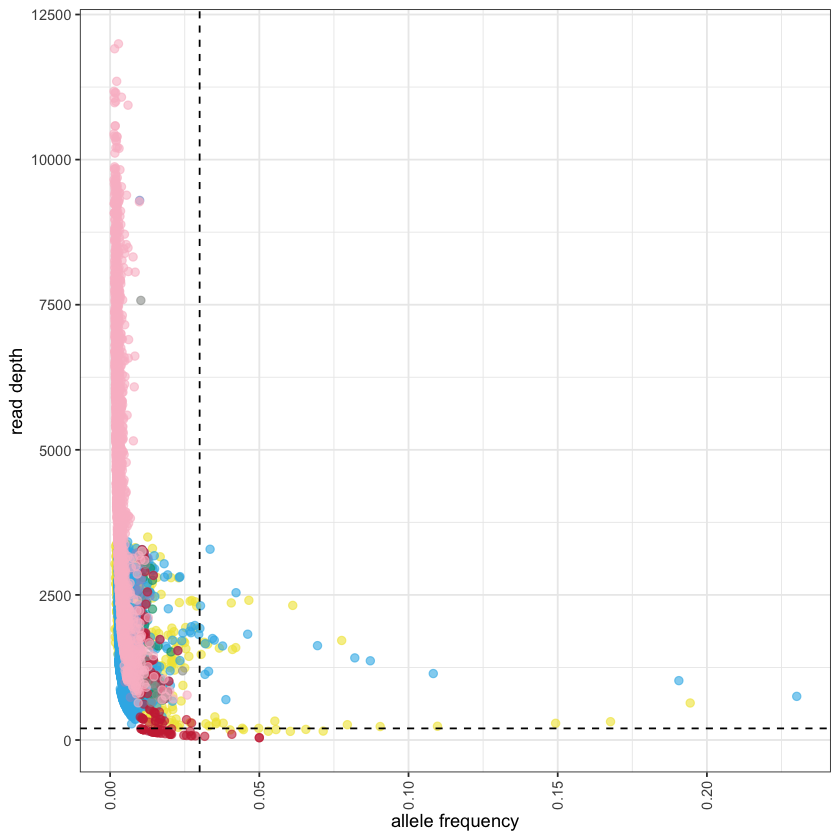

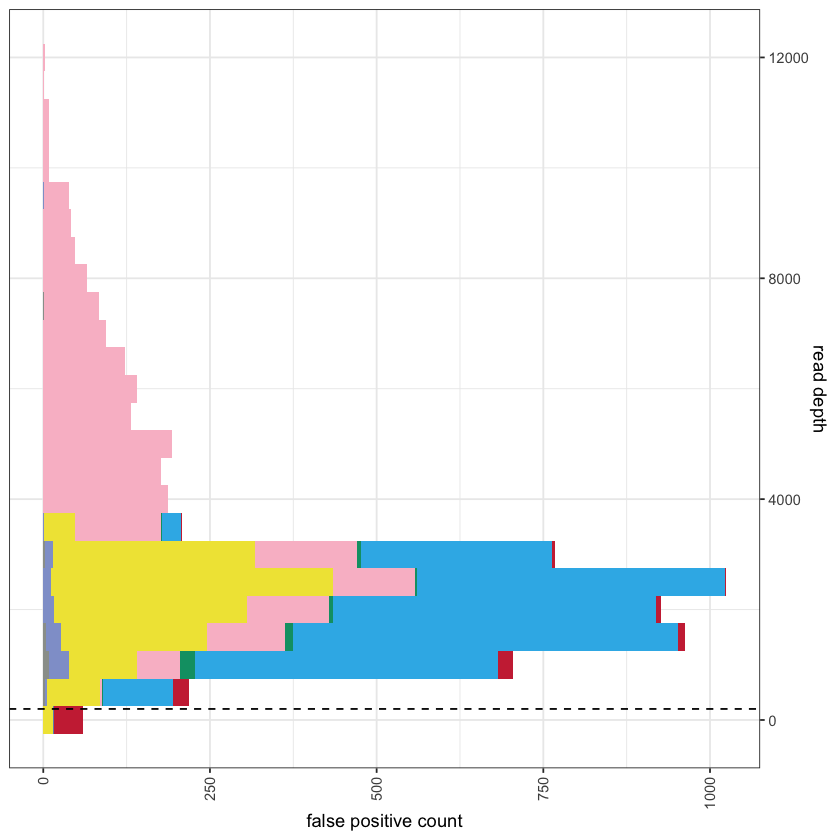

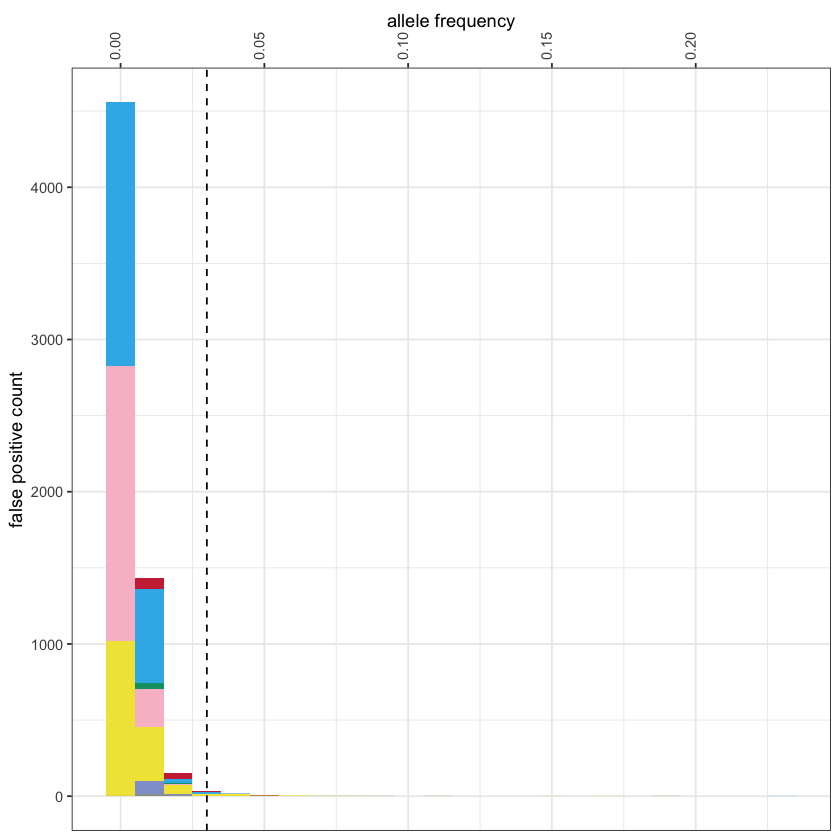

In [6]:
temp = af %>% filter(cat == 'FP') %>% unique()

plot2a1 = ggplot(temp , aes(x=varfreq, y = totalcount, color = tool)) + 
    geom_point(alpha = 0.6, size = 2) + 
    caller_colScale +
    PlotTheme1 +
    geom_hline(yintercept = 200, linetype = 2, color = 'black') + 
    geom_vline(xintercept = 0.03, linetype = 2, color = 'black') + 
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'read depth')

ggsave(plot2a1,
       filename = glue("{wkdir}/FIG.2A.1.KJ.png"),
       width = 4,
       height = 4, limitsize=FALSE)

ggsave(plot2a1,
       filename = glue("{wkdir}/FIG.2A.1.KJ.pdf"),
       width = 4,
       height = 4, limitsize=FALSE, useDingbats = FALSE)

print(plot2a1)

plot2a2 = ggplot(temp, aes(x=totalcount, fill = tool)) + 
    geom_histogram(binwidth = 500) + 
    caller_colScale_fill +
    PlotTheme1 +
    geom_vline(xintercept = 200, linetype = 2, color = 'black') + 
    theme(legend.position = 'NONE') + 
    labs(x="read depth", y= "false positive count") +
    coord_flip() +
    scale_x_continuous(position = "top")

ggsave(plot2a2,
       filename = glue("{wkdir}/FIG.2A.2.KJ.png"),
       width = 2,
       height = 4, limitsize=FALSE)

ggsave(plot2a2,
       filename = glue("{wkdir}/FIG.2A.2.KJ.pdf"),
       width = 2,
       height = 4, limitsize=FALSE, useDingbats = FALSE)

print(plot2a2)


plot2a3 = ggplot(temp, aes(x=varfreq, fill = tool)) + 
    geom_histogram(binwidth = 0.01) + 
    caller_colScale_fill +
    PlotTheme1 +
    geom_vline(xintercept = 0.03, linetype = 2, color = 'black') + 
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'false positive count')+
    scale_x_continuous(position = "top")
   
ggsave(plot2a3,
       filename = glue("{wkdir}/FIG.2A.3.KJ.png"),
       width = 4,
       height = 2, limitsize=FALSE)

ggsave(plot2a3,
       filename = glue("{wkdir}/FIG.2A.3.KJ.pdf"),
       width = 4,
       height = 2, limitsize=FALSE, useDingbats = FALSE)

print(plot2a3)


### Addressing comments. Why are FP's found at 200x-3600x read depths? Do we observe the same with the TPs?

- read depth distruptions for FP SNVs vary depending on caller. Caller strongly influences the FDR in the synthetic data.
- replicates are kept separately (no merging or filtering)

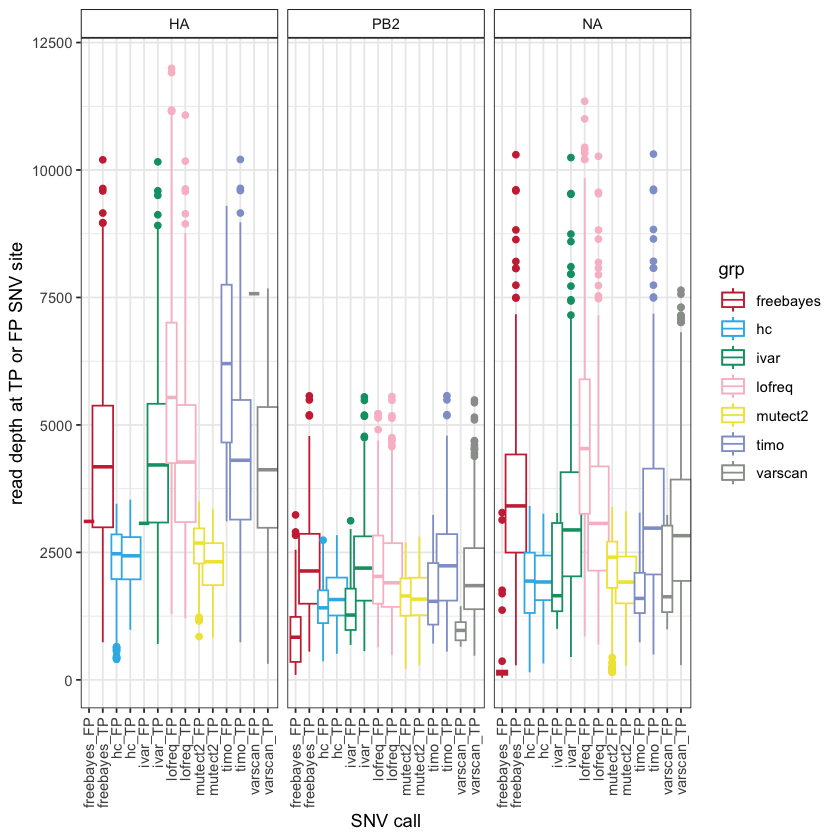

In [7]:
ggplot() + 
    geom_boxplot(data = af %>% filter(cat == 'TP'),
                aes(x=tool_cat, y = totalcount, group = tool_cat, color = tool)) + 

    geom_boxplot(data = af %>% filter(cat == 'FP'),
                aes(x=tool_cat, y = totalcount, color = tool)) + 
    caller_colScale + 
    PlotTheme1 +
    labs(y='read depth at TP or FP SNV site', 
        x='SNV call', color = 'variant caller') +
    facet_grid(.~segment)


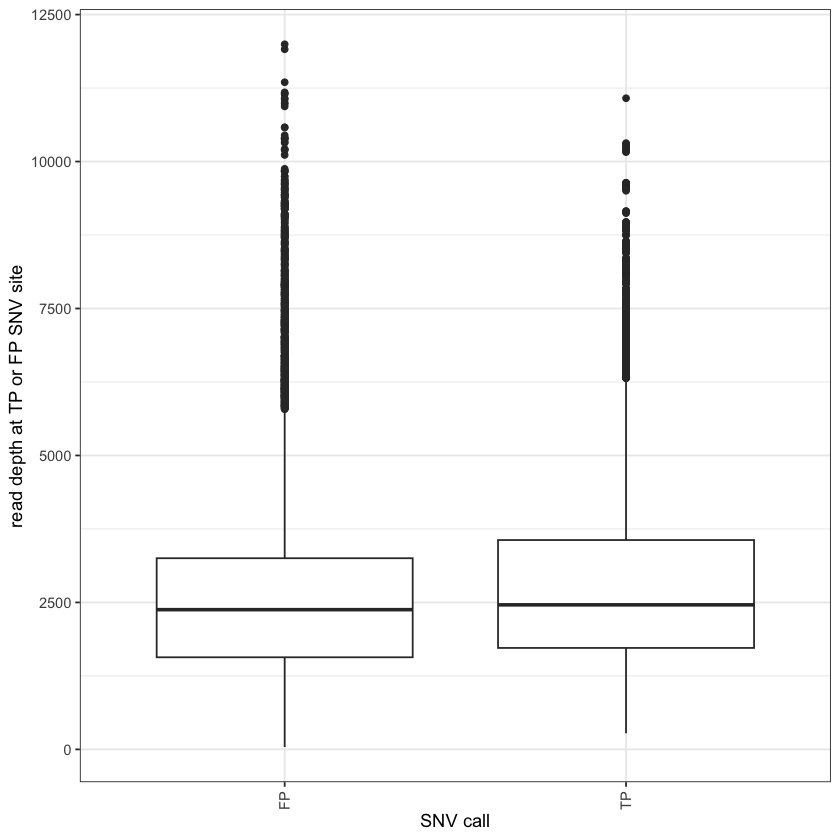

In [8]:
ggplot() + 
    geom_boxplot(data = af %>% filter(cat == 'TP'),
                aes(x='TP', y = totalcount)) + 

    geom_boxplot(data = af %>% filter(cat == 'FP'),
                aes(x='FP', y = totalcount)) + 
    caller_colScale + 
    PlotTheme1 +
    labs(y='read depth at TP or FP SNV site', 
        x='SNV call', color = 'variant caller')

In [9]:
t.test((af %>% filter(cat == 'TP') %>%
    unique())$totalcount,
(af %>% filter(cat == 'FP') %>%
    unique())$totalcount)

af %>% group_by(cat) %>%
    mutate(mean_cov = mean(totalcount),
          median_cov = median(totalcount)) %>%
    select(cat, mean_cov, median_cov) %>%
    unique()


	Welch Two Sample t-test

data:  (af %>% filter(cat == "TP") %>% unique())$totalcount and (af %>% filter(cat == "FP") %>% unique())$totalcount
t = -1.4629, df = 9559.9, p-value = 0.1435
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -95.25702  13.83861
sample estimates:
mean of x mean of y 
 2826.188  2866.897 


cat,mean_cov,median_cov
<chr>,<dbl>,<dbl>
FN,NA,NA
TP,2826.188,2459.0
FP,2866.897,2377.0
pre,2701.129,2167.5


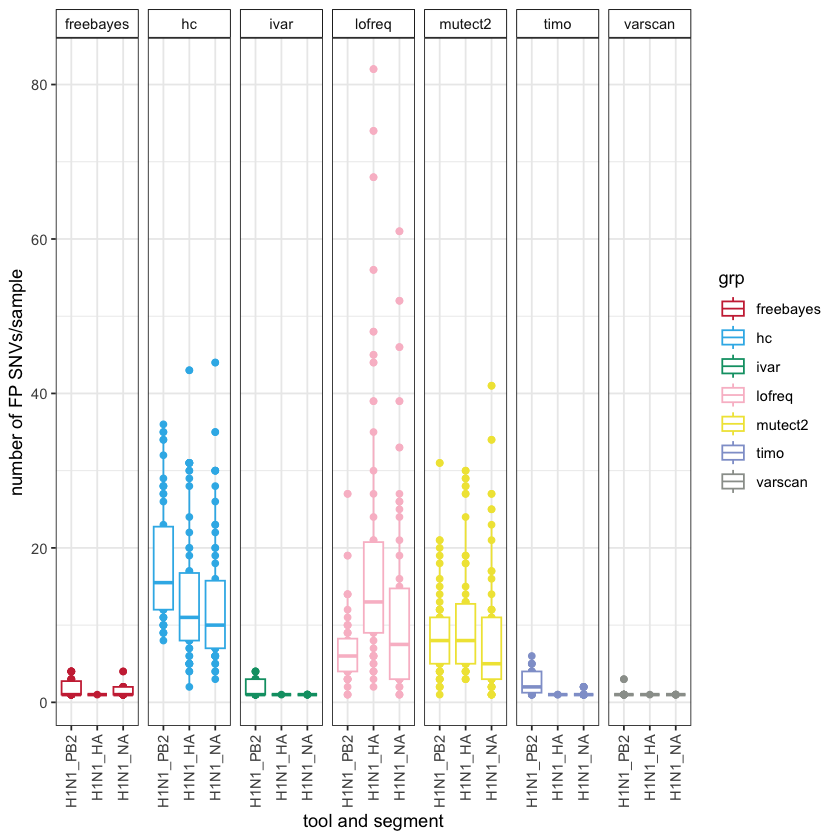

In [10]:
# looking at the location and # of of FP SNV calls as a function of gene segment and caller
af$SEGMENT = factor(af$SEGMENT, levels = c('H1N1_PB2','H1N1_HA','H1N1_NA'))

af %>% 
    group_by(sample, SEGMENT, tool, copy_number,tool_cat, Rep, cat) %>%
    tally() %>%
    filter(cat == 'FP') %>%
    unique() %>%
    ggplot(., aes(x=SEGMENT, y = n, color = tool)) +
        geom_point() + 
        geom_boxplot() + 
        PlotTheme1  +
        labs(x= 'tool and segment',y='number of FP SNVs/sample') + 
        caller_colScale + 
        facet_grid(.~tool)

# Merging replicate 1 and 2 data

- Filter for rep1 and rep 2 samples
- merge using common column variables
- add 0's for SNVs that are found in only 1 rep
- add 'cat' information, if labeled as "none" - indicates that SNV only found in one replicate - this gets updated later

In [11]:
message('filter rep1 and rep2')
r1 = af %>% filter(Rep == 'rep1') %>% unique()
r2 = af %>% filter(Rep == 'rep2') %>% unique()

filter rep1 and rep2



In [12]:
message("merge replicates")

m = merge(r1, r2, by = c('segment','ntpos','expected_freq',
                        'tool','refnt','varnt','copy_number',
                        'golden_REF','golden_ALT',
                        'SEGMENT'),
         all = TRUE) ## merge data into one file

m$varfreq.x[is.na(m$varfreq.x)] = 0  # add zeros if not present in certain rep
m$varfreq.y[is.na(m$varfreq.y)] = 0

m$cat.x[is.na(m$cat.x)] = 'none'  # add no cat. if not present in certain rep, used later to filter
m$cat.y[is.na(m$cat.y)] = 'none'
m$cat_check = paste0(m$cat.x, '_', m$cat.y)

merge replicates



In [13]:
# adjusting to make coloring work
temp = m %>% mutate(fig_color = ifelse(cat.x == cat.y, cat.x,
                                       ifelse(cat.x != cat.y & cat.y != 'none', cat.y,
                                             ifelse(cat.x != cat.y & cat.x != 'none', cat.x,'OTHER'))))

# Supp. Fig. 5B: comparing r1 and r2 output freqs across callers

Warning message:
“Removed 2334 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2334 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2334 rows containing missing values (`geom_point()`).”


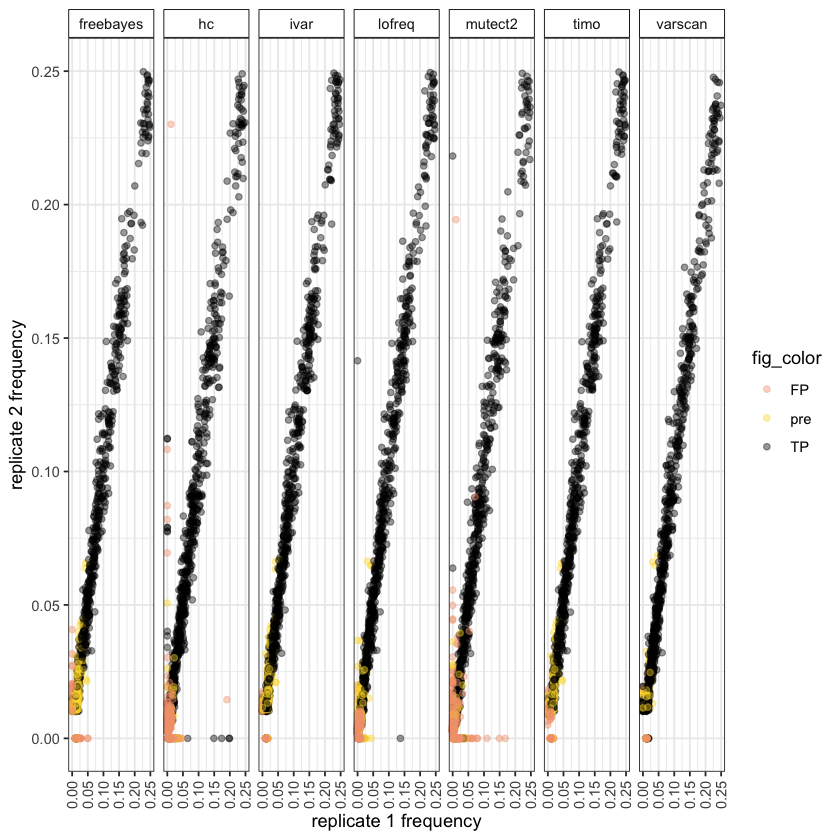

In [14]:
figS5B = ggplot(temp %>% filter(fig_color != 'FN') %>% unique(), aes(x=varfreq.x, y=varfreq.y, color = fig_color)) + 
    geom_point(alpha = 0.4) + 
    PlotTheme1 + 
    xlim(0, 0.25) + 
    ylim(0, 0.25) + 
    labs(x="replicate 1 frequency", y= 'replicate 2 frequency') + 
    scale_color_manual(values = c('#F2A07B','#fbda34','black')) + 
    facet_grid(~tool)

print(figS5B)

ggsave(figS5B,
       filename = glue("{wkdir}/figS5B_KJ.png"),
       width = 15,
       height = 3, limitsize=FALSE)

ggsave(figS5B,
       filename = glue("{wkdir}/figS5B_KJ.pdf"),
       width = 15,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


In [15]:
temp[is.na(temp), ] %>% tail() # weird rows of na that i can't remove - but are removed from above figure

,segment,ntpos,expected_freq,tool,refnt,varnt,copy_number,golden_REF,golden_ALT,SEGMENT,⋯,sample.x,tool_cat.x,varfreq.y,totalcount.y,Rep.y,cat.y,sample.y,tool_cat.y,cat_check,fig_color
,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA.39644,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.39645,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.39646,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.39647,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.39648,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.39649,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Refilter data - remove any 'pre-mrtpcr' errors that occurred 
- refilter data remove any premrtpcr errors
- filter using different freq and cov thresholds
- using ONLY rep 1 data

In [16]:
m = m %>% filter(cat.x != 'pre' & cat.y != 'pre') %>% unique()
r1 = r1 %>% filter(cat != 'pre') %>% unique()
r2 = r2 %>% filter(cat != 'pre') %>% unique()

In [17]:
filt_df = r1
filt_df$totalcount = as.numeric(as.character(filt_df$totalcount))
filt_df$varfreq = as.numeric(as.character(filt_df$varfreq))

freq_list = c(0, 0.01, 0.02, 0.03)

cov_list = c(0, 100, 200, 300)

vdf_filt = data.frame()

for(f in freq_list){
    
    for(c in cov_list){
        
        fv = filt_df %>%
                mutate(new_category = ifelse(varfreq >= f & totalcount >= c & cat == 'TP',
                                            "TP",
                                            ifelse(varfreq < f & cat == 'TP'| 
                                                   totalcount < c & cat == 'TP',
                                                  "FN", 
                                                  ifelse(cat == 'FN',
                                                        "FN", 
                                                        ifelse(cat == 'FP' & varfreq >= f & totalcount >= c,
                                                              "FP", "TN")))))
        
        fv$freq_cut = f
        
        fv$cov_cut = c
        
        vdf_filt = rbind(vdf_filt, fv)       
    }
}

vdf_filt$category = vdf_filt$new_category # make the 'category' column the 'new category' information!!

In [18]:
m$freq_cut = 0  # no cutoffs were used for the merged data, therefore marking it as 0 to make plotting easy
m$cov_cut = 0 

TP: Both reps were marked as TP and both had frequencies >0 
FN: If one rep was a TP with a freq > 0 and the other wasn't marked as TP. OR. if they were both marked as FN.
FP: If they are both marked as FP and have freqs > 0
TN: If only one is a FP and the other is missing entirely. 

In [19]:
m = m %>% mutate(new_category = ifelse(varfreq.x > 0 & varfreq.y > 0 & cat.x == cat.y & cat.x == 'TP', 'TP',# if both have freqs greater than 0 and cat is tp then make tp
                  ifelse(varfreq.x > 0 & cat.x == 'TP' & cat.x != cat.y | cat.x != cat.y & varfreq.y > 0 & cat.y == 'TP', 'FN',                     
                   ifelse(varfreq.x == 0 & cat.x == 'FN' | varfreq.y == 0 & cat.y == 'FN', 'FN', # if one IS NOT found, and fn, make fn
                          ifelse(varfreq.x > 0 & varfreq.y > 0 & cat.x == cat.y & cat.x == 'FP', 'FP',
                                ifelse(varfreq.x > 0 & varfreq.y == 0 & cat.x == 'FP', 'TN',
                                      ifelse(varfreq.y > 0 & varfreq.x == 0 & cat.y == 'FP', 'TN', 'OTHER'))))))) 


In [20]:
# adjusting category information
m$category = m$new_category
m$cat = m$new_category

In [21]:
vdf_filt = vdf_filt %>% select(-sample, -tool_cat)

m = m %>% rowwise() %>% mutate(varfreq = (varfreq.x + varfreq.y)/2,
                              totalcount = (totalcount.x + totalcount.y)/2, 
                              Rep = 'mx') %>% 
        ungroup() 

m = m %>% select(all_of(c(colnames(vdf_filt)))) # pulling vdf columns so i can rbind and plot

In [22]:
message("Category count for filt data")
vdf_filt = rbind(vdf_filt, m)  %>% ungroup() %>% unique() # combine the mx and m1 data (merged, and rep 1 data)
vdf_filt = vdf_filt %>% select(-new_category)

Category count for filt data



In [23]:
group_columns = c('copy_number','expected_freq','category',
                  'freq_cut','cov_cut', 'Rep','tool') 

In [24]:
count_filt = vdf_filt %>% 
            group_by(across(all_of(group_columns))) %>%
            add_tally(name = 'category_count') %>%
            ungroup() %>% 
            select(all_of(c(group_columns, 'category_count'))) %>%
            unique()

In [25]:
message("Adjust filtered count df")
df_filt = adjust_counts_syn(count_filt)
df_filt = adjust_information_types_syn(df_filt)

Adjust filtered count df



[1] "FP present - no adjustment needed"


# calculating F1 stats:

In [26]:
grabit_list = c('Rep', 'cov_cut', 'freq_cut','expected_freq', 'tool')

F1_DF = df_filt %>%
    group_by(across(all_of(c(grabit_list, 'copy_number')))) %>%
    mutate(mean_F1 = mean(F1),
           sd_F1 = sd(F1)) %>%
    ungroup() %>%
    select(all_of(c(grabit_list,'copy_number','mean_F1', 'sd_F1'))) %>%
    unique()


check_df = df_filt %>%
    group_by(across(all_of(grabit_list))) %>%
    mutate(mean_FNR = mean(FNR),
           sd_FNR = sd(FNR), 
          mean_FDR = mean(FDR),
          sd_FDR = sd(FDR),
          mean_F1 = mean(F1),
          sd_F1 = sd(F1)) %>%
    ungroup() %>%
    select(all_of(c(grabit_list,'mean_FNR', 'sd_FNR', 'mean_FDR', 'sd_FDR','mean_F1','sd_F1'))) %>%
    unique()

check_df$toolfreq = paste0(check_df$tool,'_',check_df$freq_cut)
check_df$toolcov = paste0(check_df$tool,'_',check_df$cov_cut)
check_df %>% filter(cov_cut == 0 & Rep == 'rep1' & tool == 'mutect2' & expected_freq == 0.50) 

F1_DF = df_filt %>% filter(cov_cut == 0 & freq_cut == 0) %>%
    select(all_of(c(grabit_list, 'copy_number', 'F1'))) %>%
    unique()

Rep,cov_cut,freq_cut,expected_freq,tool,mean_FNR,sd_FNR,mean_FDR,sd_FDR,mean_F1,sd_F1,toolfreq,toolcov
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
rep1,0,0.00,0.5,mutect2,0.2173913,0,0.34978289,0.17409630,0.7011723,0.11265650,mutect2_0,mutect2_0
rep1,0,0.01,0.5,mutect2,0.2173913,0,0.09080393,0.04668695,0.8407945,0.02022182,mutect2_0.01,mutect2_0
rep1,0,0.02,0.5,mutect2,0.2173913,0,0.01754386,0.03038686,0.8710801,0.01207004,mutect2_0.02,mutect2_0
rep1,0,0.03,0.5,mutect2,0.2173913,0,0.00000000,0.00000000,0.8780488,0.00000000,mutect2_0.03,mutect2_0


# Figure 1C, F1 stats for synthetic influenza data
- Due to incomplete 10^3 data we only used 10^4-10^6 for the paper

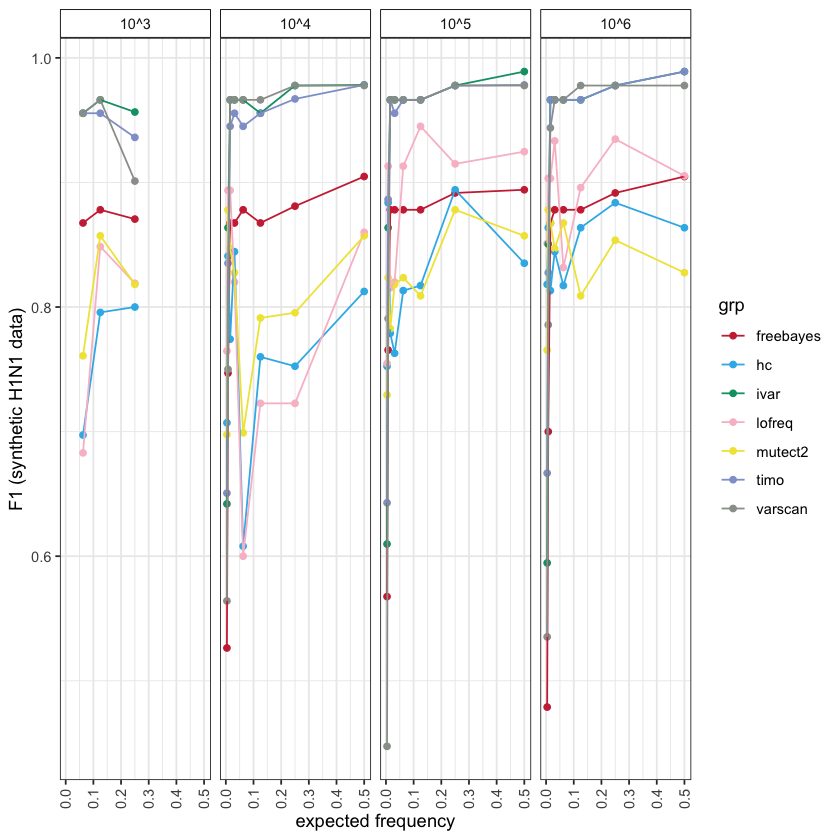

In [27]:
fig1C = ggplot() +
    geom_point(data = F1_DF %>% filter(Rep == 'mx'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool)) + 
    geom_line(data = F1_DF %>% filter(Rep == 'mx'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool)) +

    
    caller_colScale + 
    facet_grid(.~copy_number) + 
    PlotTheme1 +
    labs(x='expected frequency', y='F1 (synthetic H1N1 data)', color = 'caller')

print(fig1C)

ggsave(fig1C,
       filename = glue("{wkdir}/fig1C_KJ.png"),
       width = 8,
       height = 3, limitsize=FALSE)

ggsave(fig1C,
       filename = glue("{wkdir}/fig1C_KJ.pdf"),
       width = 8,
       height = 3, limitsize=FALSE, useDingbats = FALSE)

# Looking at FDR and FNR of synthetic data after applying cutoffs

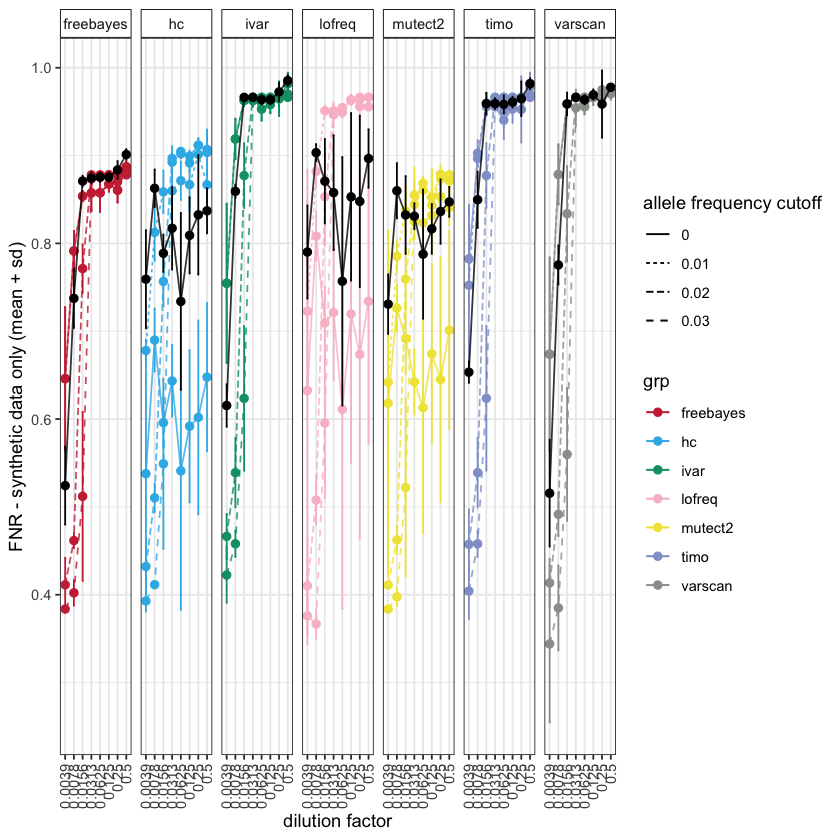

In [28]:
ggplot() + 

    geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'rep1'),
              aes(x=factor(expected_freq), y = mean_F1, 
                  color = tool, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   y = mean_F1, 
                   color = tool), 
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   ymin = mean_F1-sd_F1, 
                   ymax = mean_F1+sd_F1,
                   color = tool), 
                  width = 0.2) + 

     geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'mx'),
              aes(x=factor(expected_freq), y = mean_F1, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
               color = 'black', 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   y = mean_F1), 
                   color = 'black',
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   ymin = mean_F1-sd_F1, 
                   ymax = mean_F1+sd_F1), 
                   color = 'black',
                  width = 0.2) + 
     facet_grid(.~tool) +
    caller_colScale +
    PlotTheme1+
    labs(y = "FNR - synthetic data only (mean + sd)",
         x = "dilution factor",
         linetype = 'allele frequency cutoff')


# Figure 3A: FNR of synthetic data w/ and w/out freq cutoffs

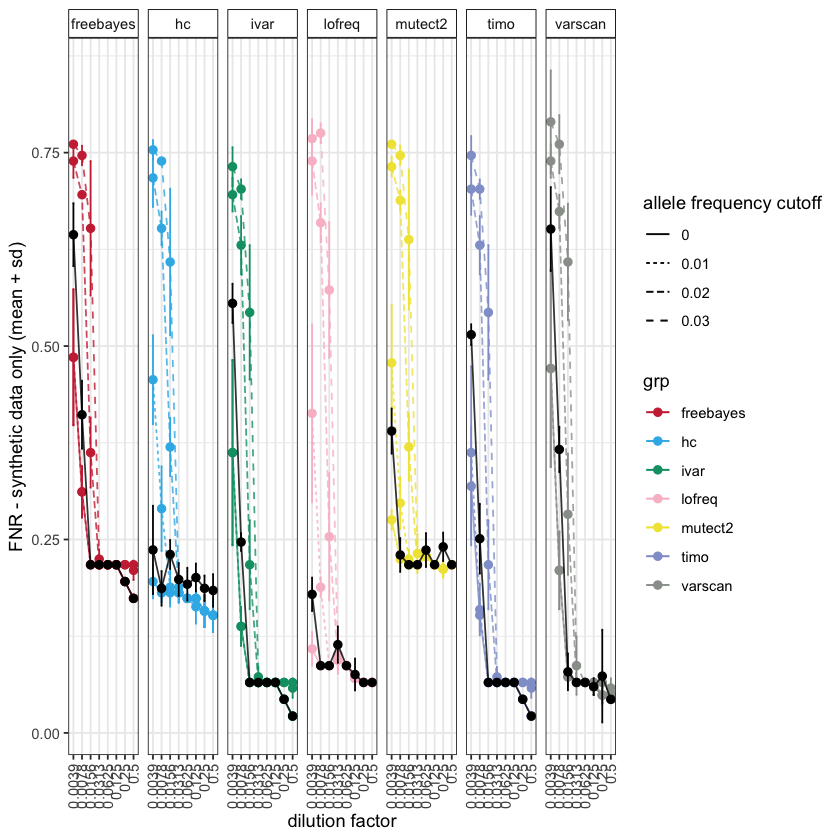

In [29]:
# UPDATED
fig3a = ggplot() + 

    geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'rep1'),
              aes(x=factor(expected_freq), y = mean_FNR, 
                  color = tool, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   y = mean_FNR, 
                   color = tool), 
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FNR-sd_FNR, 
                   ymax = mean_FNR+sd_FNR,
                   color = tool), 
                  width = 0.2) + 

     geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'mx'),
              aes(x=factor(expected_freq), y = mean_FNR, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
               color = 'black', 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   y = mean_FNR), 
                   color = 'black',
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FNR-sd_FNR, 
                   ymax = mean_FNR+sd_FNR), 
                   color = 'black',
                  width = 0.2) + 
     facet_grid(.~tool) +
    caller_colScale +
    PlotTheme1+
    labs(y = "FNR - synthetic data only (mean + sd)",
         x = "dilution factor",
         linetype = 'allele frequency cutoff')

print(fig3a)

ggsave(fig3a,
       filename = glue("{wkdir}/FIG3.FNR_KJ.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(fig3a,
       filename = glue("{wkdir}/FIG3.FNR_KJ.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


# Figure 3B: FDR of synthetic data w/ and w/out freq cutoffs


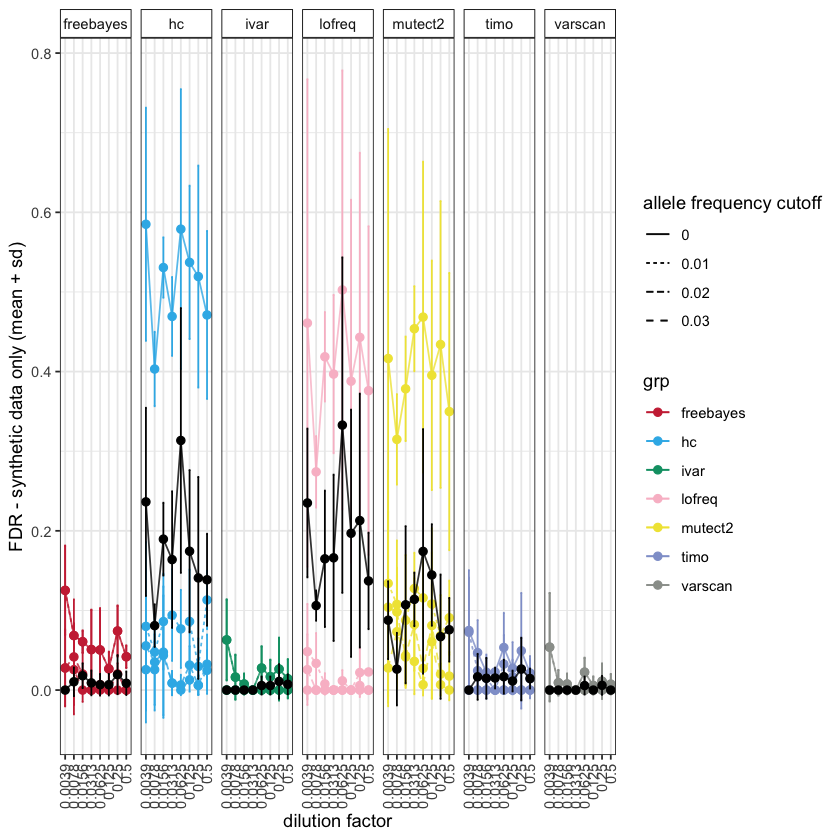

In [30]:
fig3b = ggplot() + 

    geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'rep1'),
              aes(x=factor(expected_freq), y = mean_FDR, 
                  color = tool, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   y = mean_FDR, 
                   color = tool), 
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FDR-sd_FDR, 
                   ymax = mean_FDR+sd_FDR,
                   color = tool), 
                  width = 0.2) + 

     geom_line(data = check_df %>% filter(cov_cut == 0 & Rep == 'mx'),
              aes(x=factor(expected_freq), y = mean_FDR, 
                  group = factor(toolfreq),
                  linetype = factor(freq_cut)), 
               color = 'black', 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   y = mean_FDR), 
                   color = 'black',
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(cov_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FDR-sd_FDR, 
                   ymax = mean_FDR+sd_FDR), 
                   color = 'black',
                  width = 0.2) + 
     facet_grid(.~tool) +
    caller_colScale +
    PlotTheme1 +
    labs(y = "FDR - synthetic data only (mean + sd)",
         x="dilution factor",
         linetype = 'allele frequency cutoff')

print(fig3b)

ggsave(fig3b,
       filename = glue("{wkdir}/FIG3B.FDR_KJ.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(fig3b,
       filename = glue("{wkdir}/FIG3B.FDR_KJ.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


# Coverage cutoffs, no freq cutoff.

# Supp. Fig. 3C: 

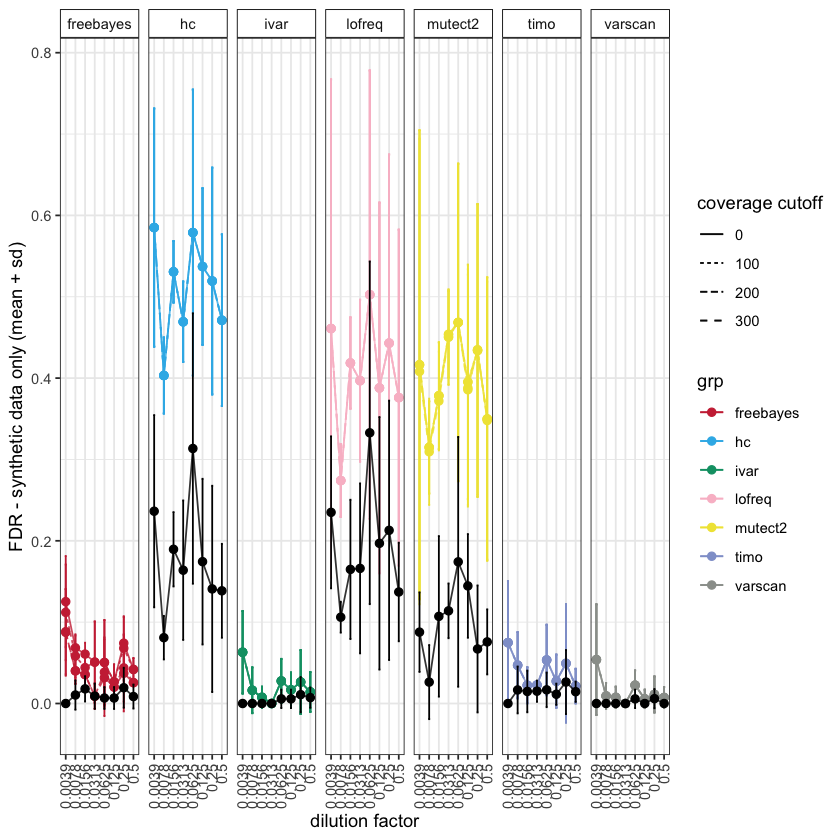

In [31]:
# UPDATED
figs3c = ggplot() + 

    geom_line(data = check_df %>% filter(freq_cut == 0 & Rep == 'rep1'),
              aes(x=factor(expected_freq), y = mean_FDR, 
                  color = tool, 
                  group = factor(cov_cut),
                  linetype = factor(cov_cut)), 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(freq_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   y = mean_FDR, 
                   color = tool), 
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(freq_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FDR-sd_FDR, 
                   ymax = mean_FDR+sd_FDR,
                   color = tool), 
                  width = 0.2) + 

     geom_line(data = check_df %>% filter(freq_cut == 0 & Rep == 'mx'),
              aes(x=factor(expected_freq), y = mean_FDR, 
                  group = factor(cov_cut),
                  linetype = factor(cov_cut)), 
               color = 'black', 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(freq_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   y = mean_FDR), 
                   color = 'black',
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(freq_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FDR-sd_FDR, 
                   ymax = mean_FDR+sd_FDR), 
                   color = 'black',
                  width = 0.2) + 
     facet_grid(.~tool) +
    caller_colScale +
    PlotTheme1 +
    labs(y = "FDR - synthetic data only (mean + sd)",
         x="dilution factor",
         linetype = 'coverage cutoff')

print(figs3c)

ggsave(figs3c,
       filename = glue("{wkdir}/figS3C.FDR_KJ.COV.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(figs3c,
       filename = glue("{wkdir}/figS3C.FDR_KJ.COV.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


# Supp. Fig. 3D

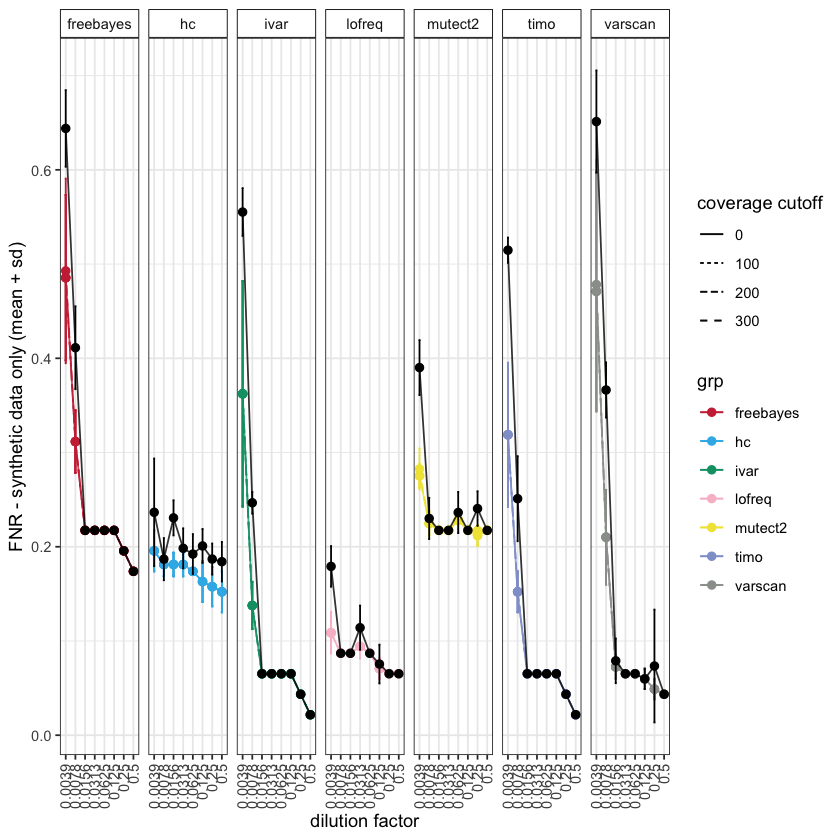

In [32]:
# UPDATED
figs3d = ggplot() + 

    geom_line(data = check_df %>% filter(freq_cut == 0 & Rep == 'rep1'),
              aes(x=factor(expected_freq), y = mean_FNR, 
                  color = tool, 
                  group = factor(toolcov),
                  linetype = factor(cov_cut)), 
              #size = 1, 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(freq_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   y = mean_FNR, 
                   color = tool), 
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(freq_cut == 0 & Rep == 'rep1'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FNR-sd_FNR, 
                   ymax = mean_FNR+sd_FNR,
                   color = tool), 
                  width = 0.2) + 

     geom_line(data = check_df %>% filter(freq_cut == 0 & Rep == 'mx'),
              aes(x=factor(expected_freq), y = mean_FNR, 
                  group = factor(toolcov),
                  linetype = factor(cov_cut)), 
               color = 'black', 
              #size = 1, 
              alpha = 0.8) +
   

    geom_point(data = check_df %>%  filter(freq_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   y = mean_FNR), 
                   color = 'black',
               size = 2) + 

     geom_errorbar(data = check_df %>%  filter(freq_cut == 0 & Rep == 'mx'),
               aes(x=factor(expected_freq), 
                   ymin = mean_FNR-sd_FNR, 
                   ymax = mean_FNR+sd_FNR), 
                   color = 'black',
                  width = 0.2) + 
     facet_grid(.~tool) +
    caller_colScale +
    PlotTheme1 +
    labs(y = "FNR - synthetic data only (mean + sd)",
         x="dilution factor",
         linetype = 'coverage cutoff')

print(figs3d)

ggsave(figs3d,
       filename = glue("{wkdir}/figS3D.FNR.COV_KJ.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(figs3d,
       filename = glue("{wkdir}/figS3D.COV_KJ.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


# looking at the impact of cutoffs on F1 data (not used for paper)

In [33]:
filt_m = m
filt_m$totalcount = as.numeric(as.character(filt_m$totalcount))
filt_m$varfreq = as.numeric(as.character(filt_m$varfreq))

freq_list = c(0, 0.01, 0.02, 0.03)
cov_list = c(0, 100, 200, 300)

vdf_filt_m = data.frame()

for(f in freq_list){
    
    for(c in cov_list){
        
        fv = filt_m %>%
                mutate(new_category = ifelse(varfreq >= f & totalcount >= c & cat == 'TP',
                                            "TP",
                                            ifelse(varfreq < f & cat == 'TP'| 
                                                   totalcount < c & cat == 'TP',
                                                  "FN", 
                                                  ifelse(cat == 'FN',
                                                        "FN", 
                                                        ifelse(cat == 'FP' & varfreq >= f & totalcount >= c,
                                                              "FP", "TN")))))
        
        fv$freq_cut = f
        
        fv$cov_cut = c
        
        vdf_filt_m = rbind(vdf_filt_m, fv)       
    }
}

vdf_filt_m$category = vdf_filt_m$new_category # make the 'category' column the 'new category' information!!

vdf_filt_m = vdf_filt_m %>% select(-new_category)

count_filt_m = vdf_filt_m %>% 
            group_by(across(all_of(group_columns))) %>%
            add_tally(name = 'category_count') %>%
            ungroup() %>% 
            select(all_of(c(group_columns, 'category_count'))) %>%
            unique()


df_filt_m = adjust_information_types_syn(adjust_counts_syn(count_filt_m)) # CHECKIT!!


[1] "FP present - no adjustment needed"


avg. and plot



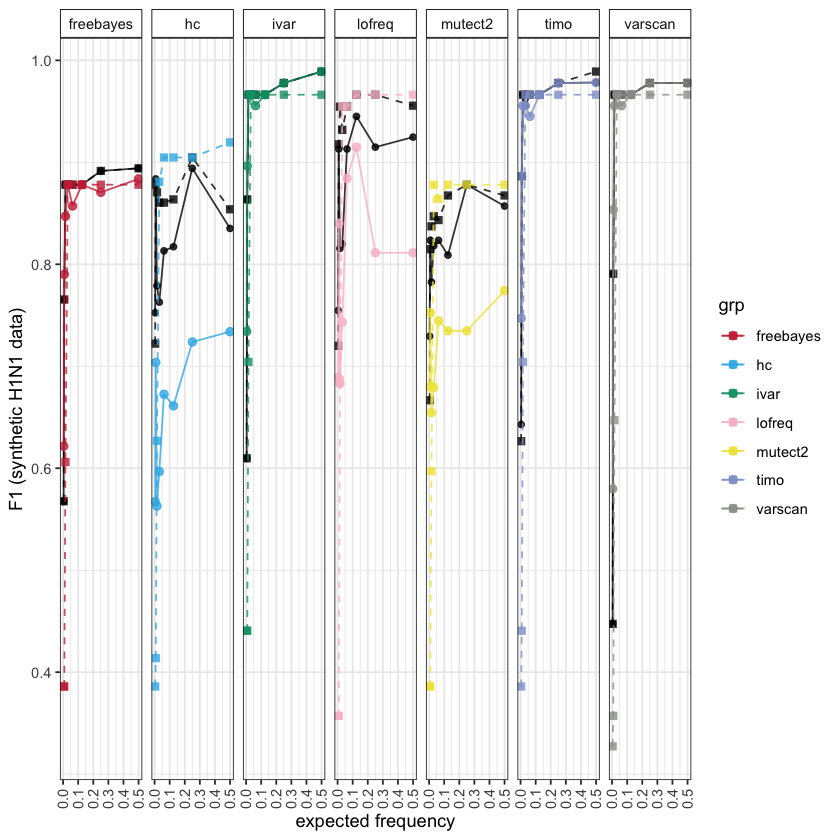

In [34]:
message("avg. and plot")
merged_means = df_filt_m %>%
    group_by(across(all_of(grabit_list))) %>%
    mutate(mean_FNR = mean(FNR),
           sd_FNR = sd(FNR), 
          mean_FDR = mean(FDR),
          sd_FDR = sd(FDR),
          mean_F1 = mean(F1),
          sd_F1 = sd(F1)) %>%
    ungroup() %>%
    select(all_of(c(grabit_list,'mean_FNR', 'sd_FNR', 'mean_FDR', 'sd_FDR','mean_F1','sd_F1'))) %>%
    unique()

f1_fig = ggplot() +
   
    geom_line(data = df_filt_m %>%filter(Rep == 'mx', cov_cut == 0 & freq_cut == 0 & copy_number == '10^5'), 
           aes(x=expected_freq, y = F1, group = tool), color = 'black', alpha = 0.8) +
     geom_point(data = df_filt_m %>% filter(Rep == 'mx', cov_cut == 0 & freq_cut == 0 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool),color = 'black', alpha = 0.8) + 

    geom_line(data = df_filt_m %>% filter(Rep == 'mx' & cov_cut == 200 & freq_cut == 0.01 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool),  color = 'black', linetype =2, alpha = 0.8) +
    geom_point(data = df_filt_m %>% filter(Rep == 'mx' & cov_cut == 200 & freq_cut == 0.01 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool),color = 'black', shape = 'square',size = 2, alpha = 0.8) + 
    

     
    geom_line(data = df_filt %>% filter(Rep == 'rep1' & cov_cut == 200 & freq_cut == 0.03 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool), linetype = 2, alpha = 0.8) +
    geom_point(data = df_filt %>% filter(Rep == 'rep1' & cov_cut == 200 & freq_cut == 0.03 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool),shape = 'square',size = 2, alpha = 0.8) + 

    
    geom_line(data = df_filt %>% filter(Rep == 'rep1' & cov_cut == 0 & freq_cut == 0 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool), alpha = 0.8) +
    geom_point(data = df_filt %>% filter(Rep == 'rep1' & cov_cut == 0 & freq_cut == 0 & copy_number == '10^5'), 
       aes(x=expected_freq, y = F1, group = tool, color = tool),size = 2, alpha = 0.8) + 

    
    caller_colScale + 
    facet_grid(.~tool) + 
    PlotTheme1 +
    labs(x='expected frequency', y='F1 (synthetic H1N1 data)', color = 'caller')

print(f1_fig)


ggsave(f1_fig,
       filename = glue("{wkdir}/F1.WithCutoffs.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(f1_fig,
       filename = glue("{wkdir}/F1.WithCutoffs.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)

In [35]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /opt/anaconda3/envs/renv/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] glue_1.6.2      forcats_0.5.2   stringr_1.5.0   purrr_0.3.5    
 [5] readr_2.1.3     tidyr_1.2.1     tibble_3.1.8    ggplot2_3.4.0  
 [9] tidyverse_1.3.2 dplyr_1.0.10    plyr_1.8.8     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9          lubridate_1.9.0     assertthat_0.2.1   
 [4] digest_0.6.31       utf8_1.2.2          IRdisplay_1.1      
 [7] R6_2.5.1            cellranger_1.1.0    repr_1.1.4         
[10] backports_1.4.1     reprex_2.0.2        evaluate_0.18      
[13] httr_1.4.4          pillar_1.8.1        rlang_1.0.6        
[16] googlesheets4_1.0.1 uuid_1.1